### 1-Merge Data

In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

df1 = pd.DataFrame({
    'customer_id': [1,2,3,4],
    'name' : ["yousef","hamdy","yassien","hassan"]
})
df1


,customer_id,name
0,1,yousef
1,2,hamdy
2,3,yassien
3,4,hassan


In [27]:
df2 = pd.DataFrame({
    'customer_id': [2,3,4,5],
    'purchase' : ["laptop","PC","phone","tablet"]
})
df2

,customer_id,purchase
0,2,laptop
1,3,PC
2,4,phone
3,5,tablet


### INNER JOIN

In [3]:
inner_join = pd.merge(df1,df2,on = 'customer_id',how = 'inner')
inner_join 

,customer_id,name,purchase
0,2,hamdy,laptop
1,3,yassien,PC
2,4,hassan,phone


### LEFT JOIN

In [4]:
#takes all of df1 and takes what applies for if from df2 
left_join = pd.merge(df1,df2,on = 'customer_id',how = 'left')
left_join 

,customer_id,name,purchase
0,1,yousef,NaN
1,2,hamdy,laptop
2,3,yassien,PC
3,4,hassan,phone


### RIGHT JOIN

In [5]:
right_join = pd.merge(df1,df2,on = 'customer_id',how = 'right')
right_join 

,customer_id,name,purchase
0,2,hamdy,laptop
1,3,yassien,PC
2,4,hassan,phone
3,5,NaN,tablet


### OUTER JOIN

In [6]:
outer_join = pd.merge(df1,df2,on = 'customer_id',how = 'outer')
outer_join

,customer_id,name,purchase
0,1,yousef,NaN
1,2,hamdy,laptop
2,3,yassien,PC
3,4,hassan,phone
4,5,NaN,tablet


### 2-HANDLE MISSING VLAUES 

In [7]:
data = {
    'age' : [25,30,None,45,60,None,65],
    'blood pressure' : [120,130,110,None,140,145,None],
    'cholestrol' : [200,None,190,210,None,180,220],
}

data = pd.DataFrame(data)
data


,age,blood pressure,cholestrol
0,25.0,120.0,200.0
1,30.0,130.0,NaN
2,NaN,110.0,190.0
3,45.0,NaN,210.0
4,60.0,140.0,NaN
5,NaN,145.0,180.0
6,65.0,NaN,220.0


In [8]:
data.isnull().sum()

age               2
blood pressure    2
cholestrol        2
dtype: int64

### remove missing value

In [9]:
data_copy=data
data_copy

,age,blood pressure,cholestrol
0,25.0,120.0,200.0
1,30.0,130.0,NaN
2,NaN,110.0,190.0
3,45.0,NaN,210.0
4,60.0,140.0,NaN
5,NaN,145.0,180.0
6,65.0,NaN,220.0


In [10]:
data_copy=data_copy.dropna()#delete all nulls
data_copy

,age,blood pressure,cholestrol
0,25.0,120.0,200.0


In [11]:
df=data.dropna(subset=['age'])#delete all nulls in a certain column/s
df

,age,blood pressure,cholestrol
0,25.0,120.0,200.0
1,30.0,130.0,NaN
3,45.0,NaN,210.0
4,60.0,140.0,NaN
6,65.0,NaN,220.0


### IMPUTATOIN

In [12]:
#impute with mean --> fillna()
data['age'].fillna(data['age'].mean(),inplace=True)
data

,age,blood pressure,cholestrol
0,25.0,120.0,200.0
1,30.0,130.0,NaN
2,45.0,110.0,190.0
3,45.0,NaN,210.0
4,60.0,140.0,NaN
5,45.0,145.0,180.0
6,65.0,NaN,220.0


In [13]:
#fill with specific value
data['cholestrol'].fillna(120,inplace=True)
data


,age,blood pressure,cholestrol
0,25.0,120.0,200.0
1,30.0,130.0,120.0
2,45.0,110.0,190.0
3,45.0,NaN,210.0
4,60.0,140.0,120.0
5,45.0,145.0,180.0
6,65.0,NaN,220.0


### 3-FEATURE SCALING 

In [14]:
# 1 - standardization sub mean and divide by standard deviation
#not affected by outlayer
#doesn't have a certain range
from sklearn.preprocessing import StandardScaler
scalor=StandardScaler()
data_stanard=scalor.fit_transform(data)
data_stanard

array([[-1.49666295, -0.70278193,  0.6004693 ],
       [-1.12249722,  0.07808688, -1.50117325],
       [ 0.        , -1.48365074,  0.33776398],
       [ 0.        ,         nan,  0.86317462],
       [ 1.12249722,  0.85895569, -1.50117325],
       [ 0.        ,  1.2493901 ,  0.07505866],
       [ 1.49666295,         nan,  1.12587994]])

In [15]:
#convert data_standard array to a data frame
data_stanard=pd.DataFrame(data_stanard,columns=data.columns)
data_stanard

,age,blood pressure,cholestrol
0,-1.496663,-0.702782,0.600469
1,-1.122497,0.078087,-1.501173
2,0.000000,-1.483651,0.337764
3,0.000000,NaN,0.863175
4,1.122497,0.858956,-1.501173
5,0.000000,1.249390,0.075059
6,1.496663,NaN,1.125880


In [16]:
# 2 - min max scalor
# (x - min )/ (max - min )
#sensitive to the outlayer
#has a certain range from 0 to 1 (or) -1 to 1

from sklearn.preprocessing import MinMaxScaler
scalor=MinMaxScaler()
data_MinMax=scalor.fit_transform(data)
data_MinMax

array([[0.        , 0.28571429, 0.8       ],
       [0.125     , 0.57142857, 0.        ],
       [0.5       , 0.        , 0.7       ],
       [0.5       ,        nan, 0.9       ],
       [0.875     , 0.85714286, 0.        ],
       [0.5       , 1.        , 0.6       ],
       [1.        ,        nan, 1.        ]])

In [17]:
data_MinMax=pd.DataFrame(data_MinMax,columns=data.columns)
data_MinMax

,age,blood pressure,cholestrol
0,0.000,0.285714,0.8
1,0.125,0.571429,0.0
2,0.500,0.000000,0.7
3,0.500,NaN,0.9
4,0.875,0.857143,0.0
5,0.500,1.000000,0.6
6,1.000,NaN,1.0


### 4-FEATURE ENGINEERING

In [18]:
#add new features
#transforming  --> encoding
#combining features
#handling missing features

ENCODING

In [19]:
# 1-label encoding

df=pd.DataFrame({
    'color' : ["red" , "green ", "blue"]
})
df

,color
0,red
1,green
2,blue


In [20]:
from sklearn.preprocessing import LabelEncoder

label=LabelEncoder()
df['color']=label.fit_transform(df['color'])
df

,color
0,2
1,1
2,0


In [21]:
# 2-mapping 
df=pd.DataFrame({
    'gender' : ["male","female"]
})
df

,gender
0,male
1,female


In [22]:
gender_map = {'male': 0 , 'female': 1 }
df['gender']=df['gender'].map(gender_map)
df

,gender
0,0
1,1


### 5-HANDLING OUTLAYERS

In [23]:
#remove them
#scale them
#capping --> putting threshold
#impute them
#using rebust models

In [24]:
df = pd.DataFrame({
    'values':[10,12,12,13,13,14,15,500,200]
})
df

,values
0,10
1,12
2,12
3,13
4,13
5,14
6,15
7,500
8,200


<Axes: ylabel='values'>

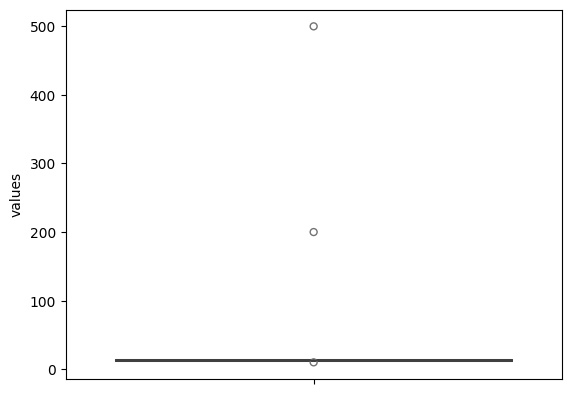

In [25]:
import seaborn as sns
sns.boxenplot(df['values'])

### 6-SPLITING DATA 

In [26]:
#split data into train test data